In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# loading pre-requisites

In [2]:
from sklearn.cluster import KMeans
from sklearn import datasets

help(datasets.load_iris)

Help on function load_iris in module sklearn.datasets._base:

load_iris(return_X_y=False)
    Load and return the iris dataset (classification).
    
    The iris dataset is a classic and very easy multi-class classification
    dataset.
    
    =================   ==============
    Classes                          3
    Samples per class               50
    Samples total                  150
    Dimensionality                   4
    Features            real, positive
    =================   ==============
    
    Read more in the :ref:`User Guide <iris_dataset>`.
    
    Parameters
    ----------
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object. See
        below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
        'data', the data to learn, 'target', the class

In [8]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
#print(iris)
print(np.unique(y))

[0 1 2]


In [6]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


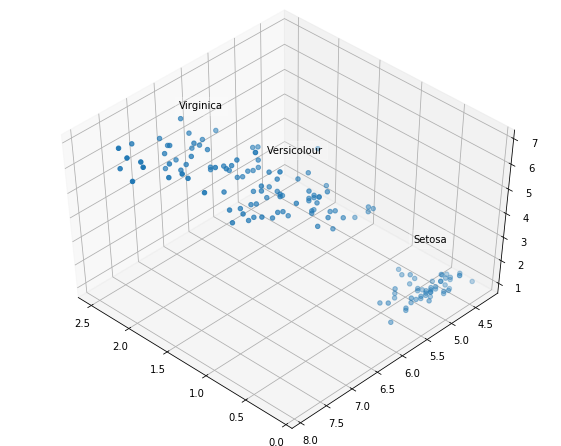

In [10]:
# Plot the ground truth
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(X[:, 3], X[:, 0], X[:, 2])#,
               c=y.astype(np.float), edgecolor='k')

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#help(train_test_split)http://localhost:8888/notebooks/plot_cluster_iris.ipynb#
clf = LogisticRegression()
X_train, X_test, y_train, y_test  = train_test_split(X, y)
print(X_train.shape)
print(X_test.shape)
clf.fit(X_train, y_train)
print(np.mean(clf.predict(X_test) != y_test))

(112, 4)
(38, 4)
0.0


In [26]:
estimator = KMeans(n_clusters = 3)

estimator.fit(X)
predictions = estimator.labels_
print(predictions)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



# K-means Clustering


The plots display firstly what a K-means algorithm would yield
using three clusters. It is then shown what the effect of a bad
initialization is on the classification process:
By setting n_init to only 1 (default is 10), the amount of
times that the algorithm will be run with different centroid
seeds is reduced.
The next plot displays what using eight clusters would deliver
and finally the ground truth.


Automatically created module for IPython interactive environment


/home/kameron/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


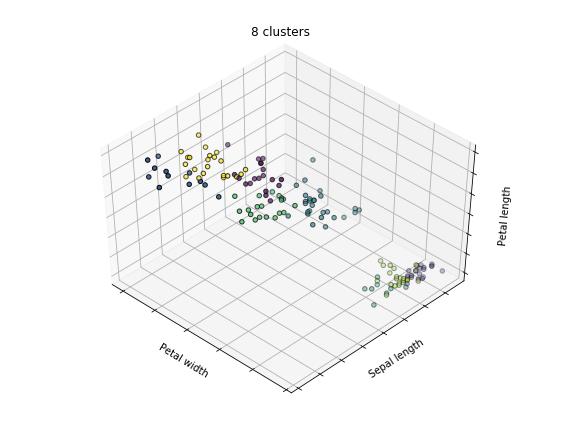

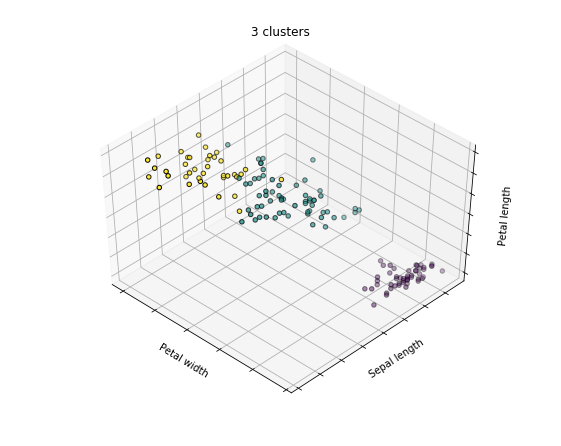

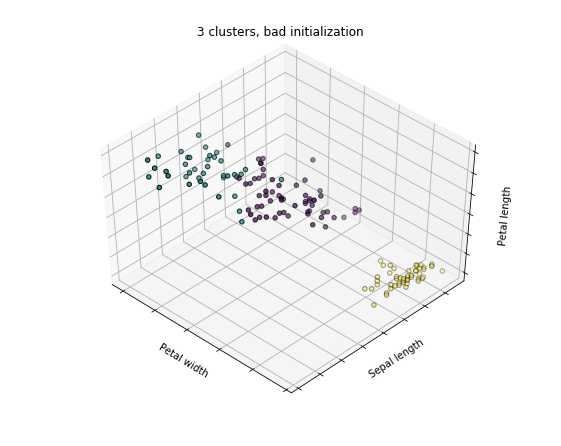

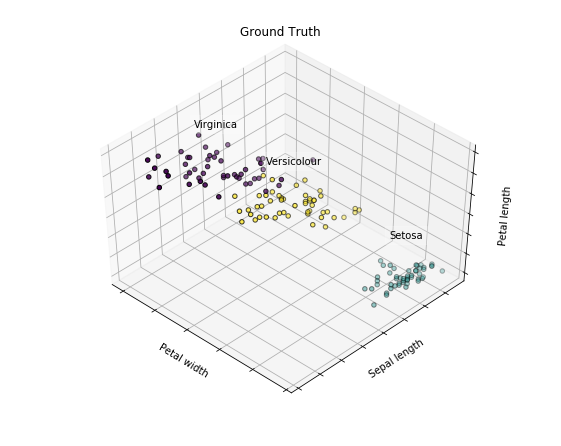

In [29]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause



np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()